In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [37]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, ConfusionMatrixDisplay


In [38]:
def load_data(test_size, drop_cols):
    df = pd.read_csv('../../creditcard.csv')
    if drop_cols:
        df = df.drop(drop_cols,axis=1)
    
    print(df.head(3))
    # Split the dataset into features (X) and target (y)
    X = df.iloc[:, :-1] # Extract all columns except the last one (which is the target)
    y = df.iloc[:, -1] # Extract only the last column (which is the target)


    # Split the dataset into training and testing sets
    return train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

In [39]:
def predict(X_train, X_test, y_train, y_test):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    y_pred_prob = gnb.predict_proba(X_test)

    return y_pred, y_pred_prob, gnb

In [40]:
def print_performance(y_test, y_pred, y_pred_prob):
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print("Recall: ", recall_score(y_test,y_pred))
    print("Precision: ", precision_score(y_test,y_pred))
    print("F1: ", f1_score(y_test,y_pred))
    print("MCC: ", matthews_corrcoef(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
    return confusion_matrix(y_test,y_pred)
    #print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    

In [41]:
def run_detector(drop_cols = False):
    # Print the sizes of the training and testing sets
    import matplotlib.pyplot as plt
    test_size = 0.2
    X_train, X_test, y_train, y_test = load_data(test_size, drop_cols)
    print("Training set size:", len(X_train))
    print("Testing set size:", len(X_test))
    y_pred, y_pred_prob, gnb = predict(X_train, X_test, y_train, y_test)
    conf_mtx = print_performance(y_test,y_pred,y_pred_prob)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtx, display_labels=gnb.classes_)
    disp.plot()
    plt.show()



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]
Training set size: 227845
Testing set size: 56962
Accuracy:  0.9922755521224677
Recall:  0.6632653061224489
Precision:  0.1377118644067

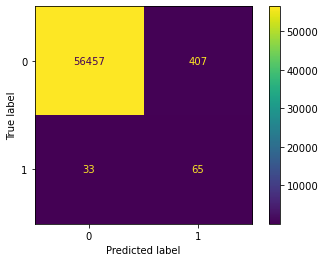

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V9       V10       V11       V12       V14       V16       V17  \
0  0.363787  0.090794 -0.551600 -0.617801 -0.311169 -0.470401  0.207971   
1 -0.255425 -0.166974  1.612727  1.065235 -0.143772  0.463917 -0.114805   
2 -1.514654  0.207643  0.624501  0.066084 -0.165946 -2.890083  1.109969   

        V18       V19       V21  Amount  Class  
0  0.025791  0.403993 -0.018307  149.62      0  
1 -0.183361 -0.145783 -0.225775    2.69      0  
2 -0.121359 -2.261857  0.247998  378.66      0  
Training set size: 227845
Testing set size: 56962
Accuracy:  0.9834977704434535
Recall:  0.8775510204081632
Precision:  0.08481262327416174
F1:  0.15467625899280577
MCC:  0.26992326969624986
ROC AUC: 0.

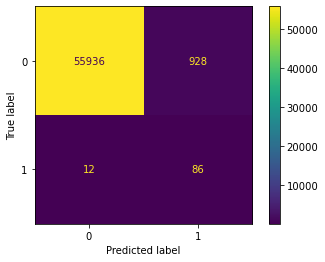

         V2        V3        V4        V5        V6        V8        V9  \
0 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.098698  0.363787   
1  0.266151  0.166480  0.448154  0.060018 -0.082361  0.085102 -0.255425   
2 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.247676 -1.514654   

        V10       V11       V12       V14       V16       V17       V18  \
0  0.090794 -0.551600 -0.617801 -0.311169 -0.470401  0.207971  0.025791   
1 -0.166974  1.612727  1.065235 -0.143772  0.463917 -0.114805 -0.183361   
2  0.207643  0.624501  0.066084 -0.165946 -2.890083  1.109969 -0.121359   

        V22       V23       V25  Amount  Class  
0  0.277838 -0.110474  0.128539  149.62      0  
1 -0.638672  0.101288  0.167170    2.69      0  
2  0.771679  0.909412 -0.327642  378.66      0  
Training set size: 227845
Testing set size: 56962
Accuracy:  0.9832695481197992
Recall:  0.8775510204081632
Precision:  0.08373904576436222
F1:  0.1528888888888889
MCC:  0.2681694146266111
ROC AUC: 0.96

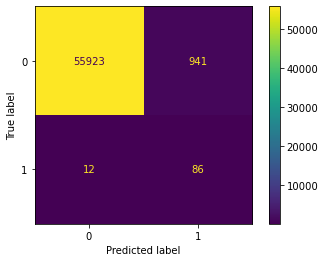

In [43]:
if __name__ == '__main__':
    drop_cols = None
    
    run_detector(drop_cols)
    drop_cols = ['Time','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
    run_detector(drop_cols)
    drop_cols = ['Time','V1','V20','V21','V7','V13','V26','V19','V24','V15','V13','V27','V28']
    run_detector(drop_cols)
    